In [1]:
'''
Import the packages needed for classification
'''
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import seaborn as sns
from scipy.ndimage import rotate
from sklearn.decomposition import PCA
from skimage.feature import hog
plt.close()

/Users/N1/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
 %config InlineBackend.figure_format = 'retina'

In [3]:
'''
Set directory parameters
'''
# Set the directories for the data and the CSV files that contain ids/labels
dir_train_images  = './training/'
dir_test_images   = './testing/'
dir_train_labels  = './labels_training.csv'
dir_test_ids      = './sample_submission.csv'

In [4]:
'''
Include the functions used for loading, preprocessing, features extraction, 
classification, and performance evaluation
'''

def load_data(dir_data, dir_labels, training=True):
    ''' Load each of the image files into memory 

    While this is feasible with a smaller dataset, for larger datasets,
    not all the images would be able to be loaded into memory

    When training=True, the labels are also loaded
    '''
    labels_pd = pd.read_csv(dir_labels)
    ids       = labels_pd.id.values
    data      = []
    for identifier in ids:
        fname     = dir_data + identifier.astype(str) + '.tif'
        image     = mpl.image.imread(fname)
        data.append(image)
    data = np.array(data) # Convert to Numpy array
    if training:
        labels = labels_pd.label.values
        return data, labels
    else:
        return data, ids

In [152]:
data, labels = load_data(dir_train_images, dir_train_labels, training=True)

In [6]:
labels_pd = pd.read_csv('./labels_training.csv')

In [7]:
# Load
labels_pd = pd.read_csv('./labels_training.csv')
# Count Classification
labels_pd['label'].value_counts()

0    995
1    505
Name: label, dtype: int64

In [8]:
labels_pd.head(3)

,id,label
0,0,0
1,1,0
2,2,1


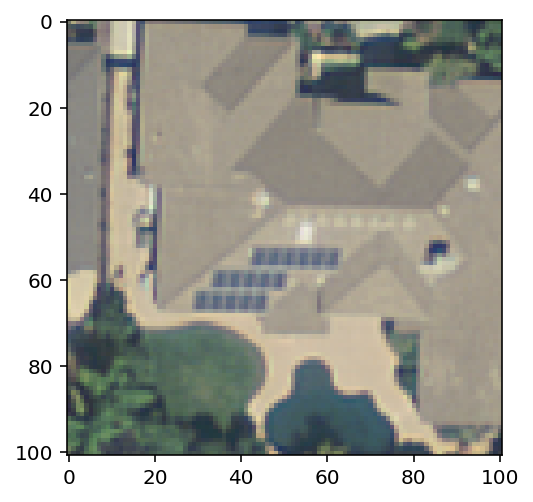

In [138]:
plt.imshow(data[1234])

In [10]:
labels1 = labels_pd[labels_pd['label']==1]
labels0 = labels_pd[labels_pd['label']==0]

# Index [149, 530, 555]
rand3_0 = labels0.sample(3)
rand3_0_list = list(rand3_0['id'])


# Index [1269, 718, 1432]
rand3_1 = labels1.sample(3)
rand3_1_list = list(rand3_1['id'])

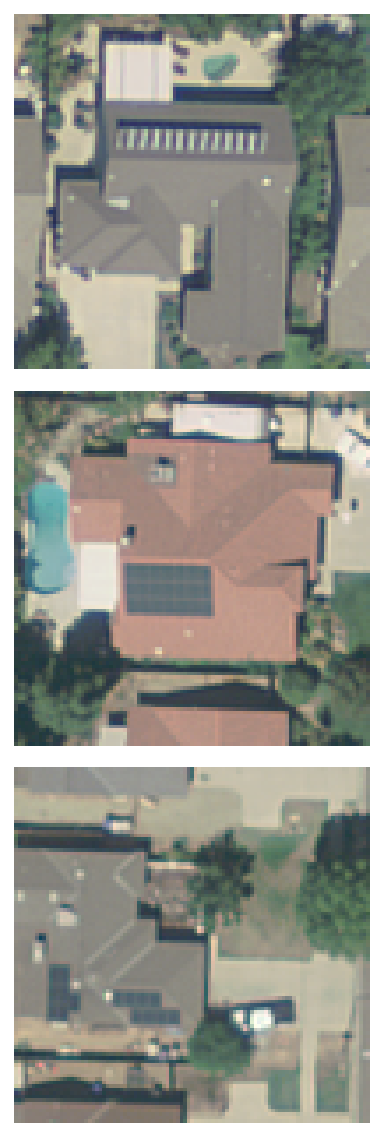

AttributeError: 'NoneType' object has no attribute 'savefig'

In [105]:
# Class 1 Images
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.imshow(data[rand3_1_list[i]])
    plt.axis('off')
    plt.tight_layout()
#plt.suptitle('Class 1: PV Array Present', size = 18, y = .7)
fig1 = plt.show()
fig1.savefig('/Users/N1/Desktop/Kaggle Report/Figures/Class1Normal.png')


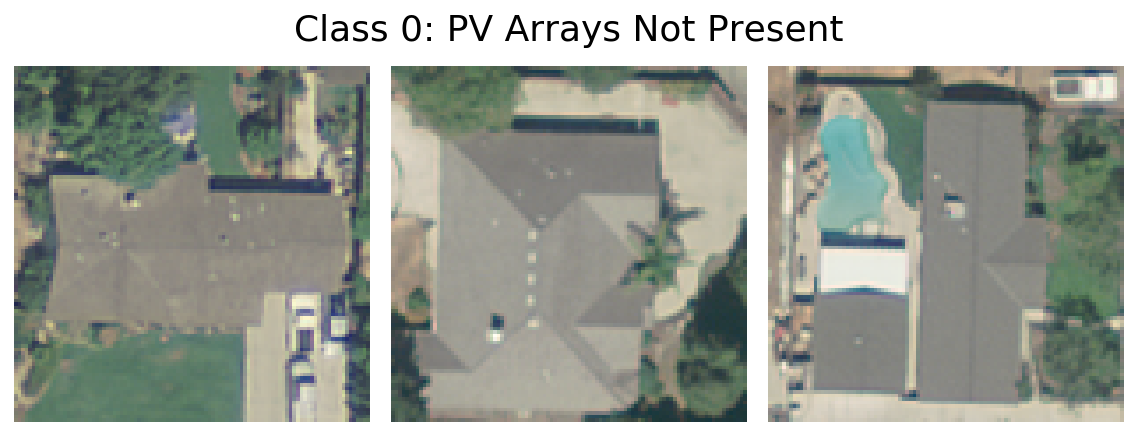

In [69]:
#Class 0 Images
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(data[rand3_0_list[i]])
    plt.axis('off')
plt.tight_layout()
plt.suptitle('Class 0: PV Arrays Not Present', size = 18, y = .7)
plt.show()

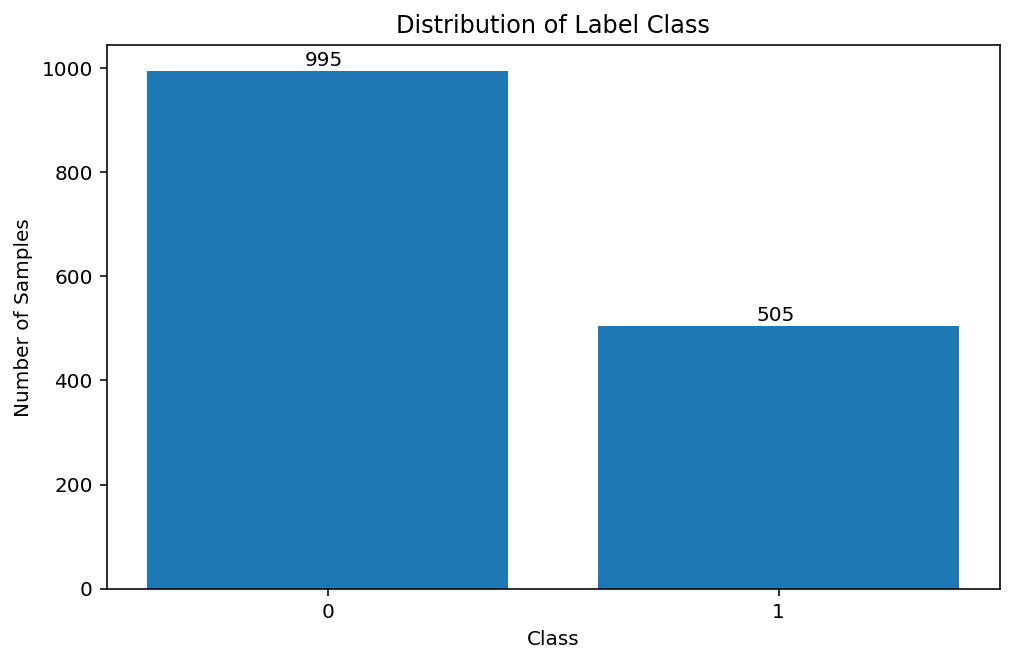

In [67]:
plt.figure(figsize=(8, 5))
hist = np.histogram(labels, bins=2)
plt.bar(np.array([0,1]),hist[0])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks([0,1])
plt.title('Distribution of Label Class')
plt.annotate('505', (.95, 515))
plt.annotate('995', (-.05, 1005))
plt.show()

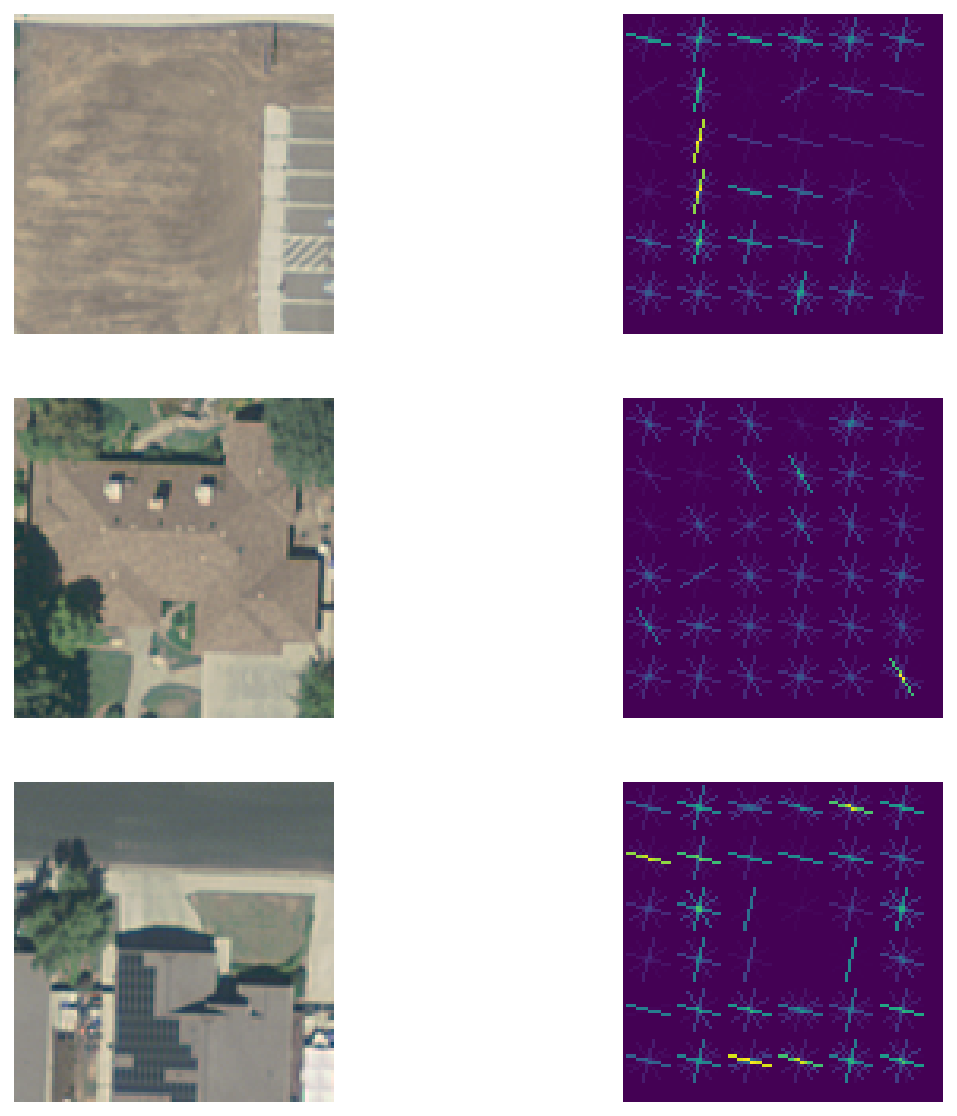

In [137]:
idex0 = [149, 530, 555]
idex1 =  [1269, 718, 1432]

numRows = 3
numCols =2
fig, ax = plt.subplots(numRows, numCols, figsize = (10,10))

for j in range(numRows): 
    fd1,h1 = hog(data_cp[idex1[j]], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(4, 4), visualize = True)
    ax[j,1].imshow(h1)
    ax[j,0].imshow(data[j])
    ax[j,0].axis('off')
    ax[j,1].axis('off')

In [ ]:
idex0 = [149, 530, 555]
idex1 =  [1269, 718, 1432]

numRows = 2
numCols =3
fig, ax = plt.subplots(numRows, numCols, figsize = (8,8))

for j in range(numCols): 
    fd0,h0 = hog(data_cp[idex0[j]], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(4, 4), visualize = True)
    fd1,h1 = hog(data_cp[idex1[j]], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(4, 4), visualize = True)
    ax[1,j].imshow(h0)
    ax[0,j].imshow(h1)
    ax[1,j].axis('off')
    ax[0,j].axis('off')

for i in range(numRows): 
    ax[i,0].axis('off')

In [155]:
hog_features = hog(data[383], block_norm='L2-Hys', pixels_per_cell=(16, 16), feature_vector=True)

In [156]:
hog_features.shape

(1296,)

In [73]:
data_cp = np.mean(data, axis=3) - np.mean(data, axis=3) % 20

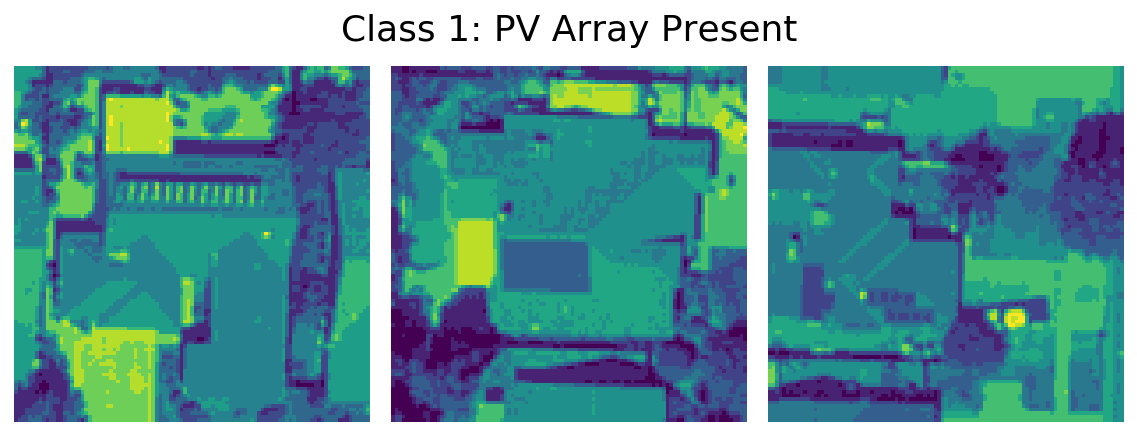

In [75]:
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(data_cp[rand3_1_list[i]])
    plt.axis('off')
plt.tight_layout()
plt.suptitle('Class 1: PV Array Present', size = 18, y = .7)
plt.show()

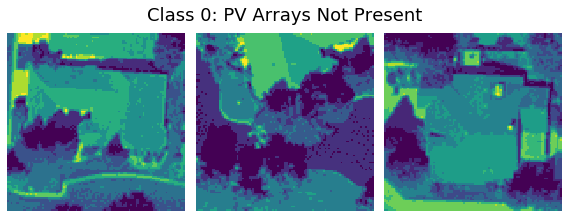

In [273]:
#Class 0 Images
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(data_cp[rand3_0_list[i]])
    plt.axis('off')
plt.tight_layout()
plt.suptitle('Class 0: PV Arrays Not Present', size = 18, y = .7)
plt.show()

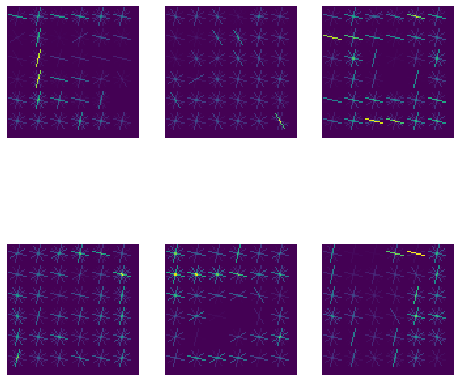

In [292]:
idex0 = [149, 530, 555]
idex1 =  [1269, 718, 1432]

numRows = 2
numCols =3
fig, ax = plt.subplots(numRows, numCols, figsize = (8,8))

for j in range(numCols): 
    fd0,h0 = hog(data_cp[idex0[j]], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(4, 4), visualize = True)
    fd1,h1 = hog(data_cp[idex1[j]], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(4, 4), visualize = True)
    ax[1,j].imshow(h0)
    ax[0,j].imshow(h1)
    ax[1,j].axis('off')
    ax[0,j].axis('off')

In [275]:
hog_features = hog(data[149], block_norm='L2-Hys',
                           pixels_per_cell=(16, 16), feature_vector=True)

TypeError: 'numpy.ndarray' object is not callable

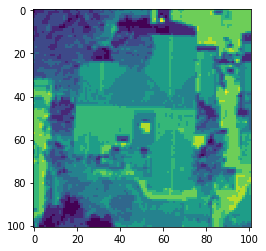

In [253]:
plt.imshow(data_cp[149])

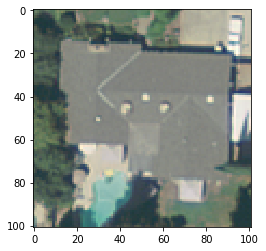

In [296]:
# WE BELIEVE THAT THIS IMAGE IS ONE THAT WAS MISCLASSIFIED 
plt.imshow(data[475])
plt.show()

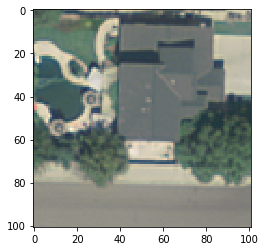

In [298]:
plt.imshow(data[998])
plt.show()

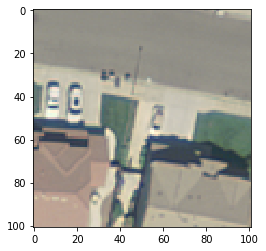

In [15]:
plt.imshow(data[383])

In [17]:
labels[383]

1

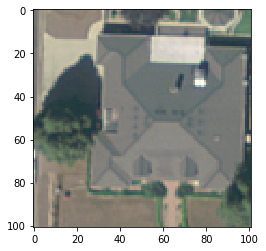

In [299]:
plt.imshow(data[613])
plt.show()

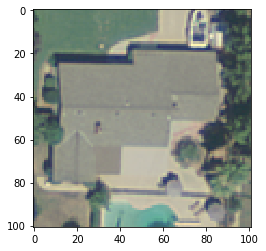

In [310]:
plt.imshow(data[1050])
plt.show()

In [318]:
data

array([[[[208, 203, 185],
         [212, 208, 188],
         [206, 194, 180],
         ...,
         [209, 206, 186],
         [207, 203, 183],
         [210, 205, 186]],

        [[220, 210, 180],
         [226, 214, 182],
         [227, 207, 180],
         ...,
         [211, 207, 189],
         [208, 204, 186],
         [210, 205, 187]],

        [[146, 153, 147],
         [171, 168, 154],
         [169, 168, 156],
         ...,
         [216, 207, 184],
         [213, 205, 182],
         [215, 205, 184]],

        ...,

        [[165, 153, 139],
         [151, 142, 129],
         [142, 135, 124],
         ...,
         [145, 141, 132],
         [146, 143, 137],
         [145, 142, 133]],

        [[174, 164, 146],
         [156, 148, 134],
         [149, 140, 129],
         ...,
         [138, 139, 132],
         [138, 138, 132],
         [142, 142, 131]],

        [[180, 173, 149],
         [165, 158, 140],
         [153, 146, 132],
         ...,
         [166, 161, 152],
        

In [ ]:
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(data_cp[rand3_1_list[i]])
    plt.axis('off')
plt.tight_layout()
plt.suptitle('Class 1: PV Array Present', size = 18, y = .7)
plt.show()

In [94]:
# round up to nearest i + hog
from skimage.feature import hog
def preprocess_and_extract_features(data):
    hog_images = []
    hog_features = []
    data = np.mean(data, axis=3) - np.mean(data, axis=3) % 20
    #data = np.dot(data, [0.2989, 0.5870, 0.1140])
    data_list = [data[i] for i in range(data.shape[0])]
    for image in data_list:
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(4, 4), visualize=True)
        hog_images.append(hog_image)
        hog_features.append(fd)
    features = np.array(hog_features)
    return features

In [86]:
# svm
from sklearn.svm import SVC
def set_classifier():
    '''Shared function to select the classifier for both performance evaluation
    and testing
    '''
    return SVC(C=10, gamma='scale', probability=True)

In [157]:
def cv_performance_assessment(X,y,k,clf):
    '''Cross validated performance assessment
    
    X   = training data
    y   = training labels
    k   = number of folds for cross validation
    clf = classifier to use
    
    Divide the training data into k folds of training and validation data. 
    For each fold the classifier will be trained on the training data and
    tested on the validation data. The classifier prediction scores are 
    aggregated and output
    '''
    # Establish the k folds
    prediction_scores = np.empty(y.shape[0],dtype='object')
    kf = StratifiedKFold(n_splits=k, shuffle=True)
    for train_index, val_index in kf.split(X, y):
        # Extract the training and validation data for this fold
        X_train, X_val   = X[train_index], X[val_index]
        y_train          = y[train_index]
        
        # Train the classifier
        X_train_features = preprocess_and_extract_features(X_train)
        clf              = clf.fit(X_train_features,y_train)
        
        # Test the classifier on the validation data for this fold
        X_val_features   = preprocess_and_extract_features(X_val)
        cpred            = clf.predict_proba(X_val_features)
        
        # Save the predictions for this fold
        prediction_scores[val_index] = cpred[:,1]
    return prediction_scores, cpred

In [15]:
def plot_roc(labels, prediction_scores):
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
   
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()

In [158]:
'''
Sample script for cross validated performance
'''
# Set parameters for the analysis
num_training_folds = 5

# Load the data
data, labels = load_data(dir_train_images, dir_train_labels, training=True)

# Choose which classifier to use
clf = set_classifier()

# Perform cross validated performance assessment
prediction_scores = cv_performance_assessment(data,labels,num_training_folds,clf)

# Compute and plot the ROC curves
plot_roc(labels, prediction_scores)

NameError: name 'plot_roc' is not defined

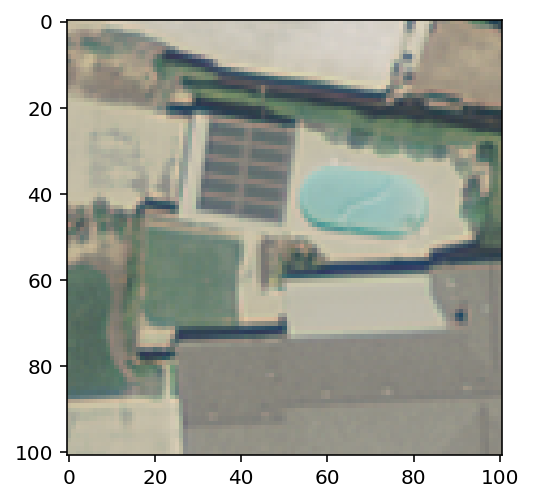

In [162]:
plt.imshow(data[3])

In [ ]:
cpred

hog + svc, 0.747
hog + svc, 0.729 gray
hog + rf 0.717
hog + et 0.723
hog + pca 0.603

round off to nearest 40 + hog + svc 0.759
round off to nearest 30 + hog + svc 0.769
round off to nearest 20 + hog + svc 0.780
round off to nearest 10 + hog + svc 0.772

round off to nearest 20 + hog + svm 0.829
round off to nearest 20 + hog + svm 0.838 6k image
threshold off lowest 30 percentile, round off to nearest 20 + hog + svm 0.836 6k image

svm C=0.001: auc 0.795394795760983
svm C=0.01: auc 0.7946484899746256
svm C=0.1: auc 0.7952037414796757
svm C=1: auc 0.818208866112742
svm C=10: auc 0.8274740036817751
svm C=100: auc 0.8219364147470023


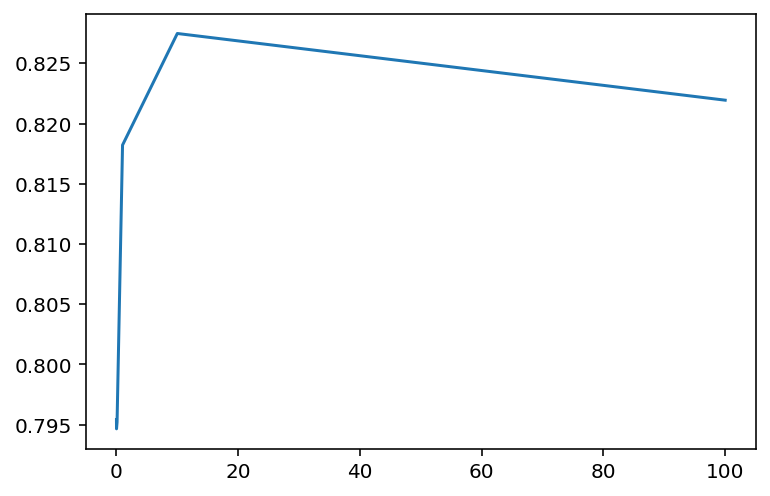

In [95]:
# loop for C for svm
# Set parameters for the analysis
num_training_folds = 5

# Load the data
data, labels = load_data(dir_train_images, dir_train_labels, training=True)

# Choose which classifier to use
C = [0.001, 0.01, 0.1, 1, 10, 100]
auc_list = []
for c in C:
    clf = SVC(C=c, gamma='scale', probability=True)
    # Perform cross validated performance assessment
    prediction_scores = cv_performance_assessment(data,labels,num_training_folds,clf)
    auc_list.append(metrics.roc_auc_score(labels, prediction_scores))
    print(f"svm C={c}: auc {auc_list[-1]}")

# Compute and plot the ROC curves
plt.plot(C, auc_list)